## Laboratorio No 3
### 21001119 Velvet Gonzalez
### 07140147 Jose Hernandez

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [2]:
dataset = pd.read_csv('train.csv')
dataset = dataset.sort_values('date').reset_index()
dataset = dataset.drop(['index'], axis = 1)
dataset.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-01,7,12,26
2,2013-01-01,7,46,27
3,2013-01-01,8,12,54
4,2013-01-01,9,12,35


In [3]:
dataset['store'].unique()

array([ 1,  7,  8,  9, 10,  6,  2,  5,  3,  4], dtype=int64)

In [4]:
dataset['item'].unique()

array([ 1, 12, 46, 13, 14, 45, 10, 47, 11, 44, 17, 18, 19, 16, 15,  3, 50,
       49,  4,  5,  2,  8, 48,  9,  7,  6, 30, 39, 31, 32, 28, 40, 29, 35,
       38, 37, 36, 33, 34, 43, 21, 22, 42, 23, 20, 26, 41, 27, 25, 24],
      dtype=int64)

<AxesSubplot:xlabel='item', ylabel='sales'>

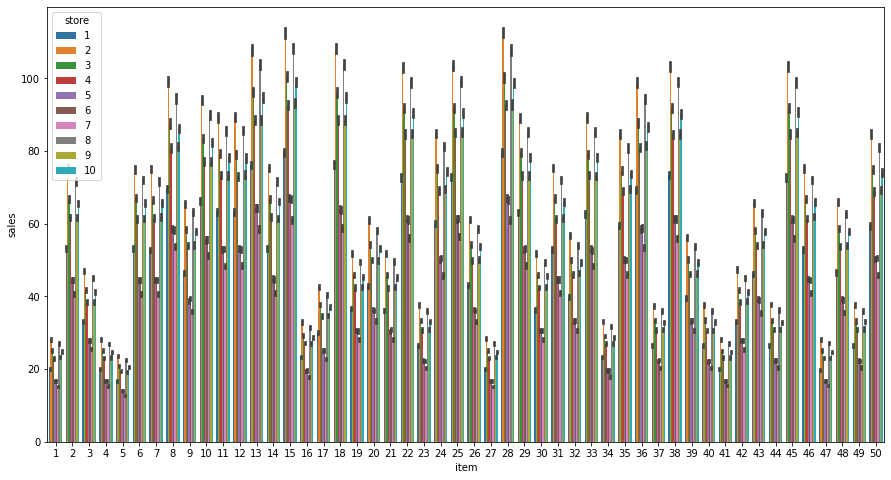

In [5]:
plt.figure(figsize = (15, 8)),
sns.barplot(x= 'item', y ='sales', data = dataset, hue = 'store')

## Ingeniería de características y agrupamiento por tienda

In [6]:
pivote = pd.pivot_table(dataset, values= 'sales', index=['date'], columns = ['store', 'item'], aggfunc=np.sum)

In [7]:
pivote.columns = pivote.columns.droplevel(0)
pivote.columns.name = None
data = pivote.reset_index()
#train.to_csv('pivot_ventas.csv')

In [8]:
cols = ["date","S1-1","S1-2","S1-3","S1-4","S1-5","S1-6","S1-7","S1-8","S1-9","S1-10","S1-11","S1-12","S1-13","S1-14","S1-15","S1-16","S1-17","S1-18","S1-19","S1-20","S1-21","S1-22","S1-23","S1-24","S1-25","S1-26","S1-27","S1-28","S1-29","S1-30","S1-31","S1-32","S1-33","S1-34","S1-35","S1-36","S1-37","S1-38","S1-39","S1-40","S1-41","S1-42","S1-43","S1-44","S1-45","S1-46","S1-47","S1-48","S1-49","S1-50","S2-1","S2-2","S2-3","S2-4","S2-5","S2-6","S2-7","S2-8","S2-9","S2-10","S2-11","S2-12","S2-13","S2-14","S2-15","S2-16","S2-17","S2-18","S2-19","S2-20","S2-21","S2-22","S2-23","S2-24","S2-25","S2-26","S2-27","S2-28","S2-29","S2-30","S2-31","S2-32","S2-33","S2-34","S2-35","S2-36","S2-37","S2-38","S2-39","S2-40","S2-41","S2-42","S2-43","S2-44","S2-45","S2-46","S2-47","S2-48","S2-49","S2-50","S3-1","S3-2","S3-3","S3-4","S3-5","S3-6","S3-7","S3-8","S3-9","S3-10","S3-11","S3-12","S3-13","S3-14","S3-15","S3-16","S3-17","S3-18","S3-19","S3-20","S3-21","S3-22","S3-23","S3-24","S3-25","S3-26","S3-27","S3-28","S3-29","S3-30","S3-31","S3-32","S3-33","S3-34","S3-35","S3-36","S3-37","S3-38","S3-39","S3-40","S3-41","S3-42","S3-43","S3-44","S3-45","S3-46","S3-47","S3-48","S3-49","S3-50","S4-1","S4-2","S4-3","S4-4","S4-5","S4-6","S4-7","S4-8","S4-9","S4-10","S4-11","S4-12","S4-13","S4-14","S4-15","S4-16","S4-17","S4-18","S4-19","S4-20","S4-21","S4-22","S4-23","S4-24","S4-25","S4-26","S4-27","S4-28","S4-29","S4-30","S4-31","S4-32","S4-33","S4-34","S4-35","S4-36","S4-37","S4-38","S4-39","S4-40","S4-41","S4-42","S4-43","S4-44","S4-45","S4-46","S4-47","S4-48","S4-49","S4-50","S5-1","S5-2","S5-3","S5-4","S5-5","S5-6","S5-7","S5-8","S5-9","S5-10","S5-11","S5-12","S5-13","S5-14","S5-15","S5-16","S5-17","S5-18","S5-19","S5-20","S5-21","S5-22","S5-23","S5-24","S5-25","S5-26","S5-27","S5-28","S5-29","S5-30","S5-31","S5-32","S5-33","S5-34","S5-35","S5-36","S5-37","S5-38","S5-39","S5-40","S5-41","S5-42","S5-43","S5-44","S5-45","S5-46","S5-47","S5-48","S5-49","S5-50","S6-1","S6-2","S6-3","S6-4","S6-5","S6-6","S6-7","S6-8","S6-9","S6-10","S6-11","S6-12","S6-13","S6-14","S6-15","S6-16","S6-17","S6-18","S6-19","S6-20","S6-21","S6-22","S6-23","S6-24","S6-25","S6-26","S6-27","S6-28","S6-29","S6-30","S6-31","S6-32","S6-33","S6-34","S6-35","S6-36","S6-37","S6-38","S6-39","S6-40","S6-41","S6-42","S6-43","S6-44","S6-45","S6-46","S6-47","S6-48","S6-49","S6-50","S7-1","S7-2","S7-3","S7-4","S7-5","S7-6","S7-7","S7-8","S7-9","S7-10","S7-11","S7-12","S7-13","S7-14","S7-15","S7-16","S7-17","S7-18","S7-19","S7-20","S7-21","S7-22","S7-23","S7-24","S7-25","S7-26","S7-27","S7-28","S7-29","S7-30","S7-31","S7-32","S7-33","S7-34","S7-35","S7-36","S7-37","S7-38","S7-39","S7-40","S7-41","S7-42","S7-43","S7-44","S7-45","S7-46","S7-47","S7-48","S7-49","S7-50","S8-1","S8-2","S8-3","S8-4","S8-5","S8-6","S8-7","S8-8","S8-9","S8-10","S8-11","S8-12","S8-13","S8-14","S8-15","S8-16","S8-17","S8-18","S8-19","S8-20","S8-21","S8-22","S8-23","S8-24","S8-25","S8-26","S8-27","S8-28","S8-29","S8-30","S8-31","S8-32","S8-33","S8-34","S8-35","S8-36","S8-37","S8-38","S8-39","S8-40","S8-41","S8-42","S8-43","S8-44","S8-45","S8-46","S8-47","S8-48","S8-49","S8-50","S9-1","S9-2","S9-3","S9-4","S9-5","S9-6","S9-7","S9-8","S9-9","S9-10","S9-11","S9-12","S9-13","S9-14","S9-15","S9-16","S9-17","S9-18","S9-19","S9-20","S9-21","S9-22","S9-23","S9-24","S9-25","S9-26","S9-27","S9-28","S9-29","S9-30","S9-31","S9-32","S9-33","S9-34","S9-35","S9-36","S9-37","S9-38","S9-39","S9-40","S9-41","S9-42","S9-43","S9-44","S9-45","S9-46","S9-47","S9-48","S9-49","S9-50","S10-1","S10-2","S10-3","S10-4","S10-5","S10-6","S10-7","S10-8","S10-9","S10-10","S10-11","S10-12","S10-13","S10-14","S10-15","S10-16","S10-17","S10-18","S10-19","S10-20","S10-21","S10-22","S10-23","S10-24","S10-25","S10-26","S10-27","S10-28","S10-29","S10-30","S10-31","S10-32","S10-33","S10-34","S10-35","S10-36","S10-37","S10-38","S10-39","S10-40","S10-41","S10-42","S10-43","S10-44","S10-45","S10-46","S10-47","S10-48","S10-49","S10-50"]

data.columns = cols    
data.head()

,date,S1-1,S1-2,S1-3,S1-4,S1-5,S1-6,S1-7,S1-8,S1-9,...,S10-41,S10-42,S10-43,S10-44,S10-45,S10-46,S10-47,S10-48,S10-49,S10-50
0,2013-01-01,13,33,15,10,11,31,25,33,18,...,12,20,24,17,45,37,11,25,17,33
1,2013-01-02,11,43,30,11,6,36,23,37,23,...,10,22,29,10,45,33,13,24,13,37
2,2013-01-03,14,23,14,8,8,18,34,38,25,...,17,27,43,20,56,28,16,29,19,46
3,2013-01-04,13,18,10,19,9,19,36,54,22,...,13,24,27,12,50,44,11,39,23,51
4,2013-01-05,10,34,23,12,8,31,38,51,29,...,14,25,31,25,62,45,16,34,22,41


In [9]:
data['total_ventas'] = data.sum(axis = 1)

C:\Users\velgo\AppData\Local\Temp/ipykernel_7660/2503668956.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['total_ventas'] = data.sum(axis = 1)


In [10]:
data.shape

(1826, 502)

In [11]:
def getNanColNames(df):
    colnames = df.columns
    cols_con_na = []
    for col in colnames:
        if(df[col].isnull().sum() > 0):
            cols_con_na.append(col)
    return cols_con_na

In [12]:
getNanColNames(data)

[]

In [13]:
data_unscaled = np.array(data)
data_unscaled

array([['2013-01-01', 13, 33, ..., 17, 33, 13696],
       ['2013-01-02', 11, 43, ..., 13, 37, 13678],
       ['2013-01-03', 14, 23, ..., 19, 46, 14488],
       ...,
       ['2017-12-29', 15, 50, ..., 26, 74, 23535],
       ['2017-12-30', 27, 56, ..., 40, 62, 24988],
       ['2017-12-31', 23, 67, ..., 42, 82, 26420]], dtype=object)

In [14]:
data_unscaled_ventas = np.array(data['total_ventas']).reshape(-1,1)
data_unscaled_ventas

array([[13696],
       [13678],
       [14488],
       ...,
       [23535],
       [24988],
       [26420]], dtype=int64)

In [15]:
s1 = data.iloc[:, 1:2].values

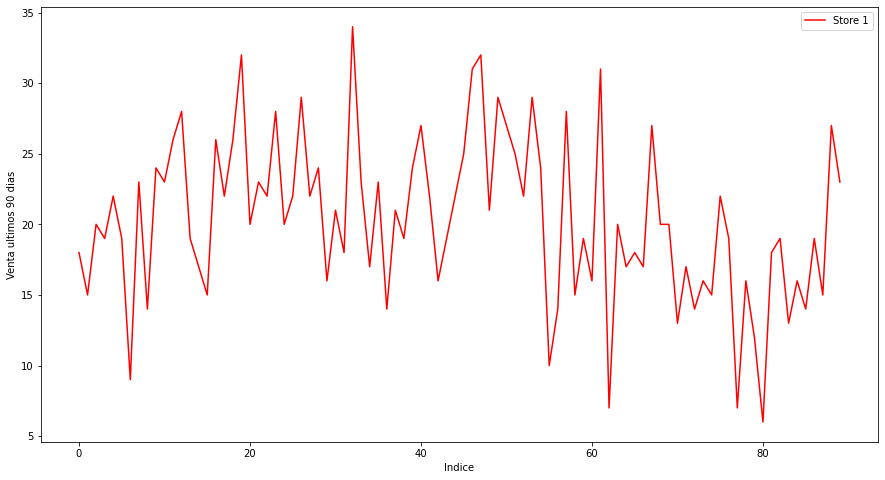

In [16]:
plt.figure(figsize = (15, 8)),
plt.plot(s1[(data.shape[0]-90):data.shape[0]], color='red', label='Store 1')
plt.xlabel("Indice")
plt.ylabel("Venta ultimos 90 dias")
plt.legend()
plt.show()

## Partición de datos en train y test

In [17]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_unscaled_ventas)
data_scaled.shape

(1826, 1)

In [18]:
test = data.drop(['date'], axis = 1)
test = test.iloc[1461:data.shape[0]]
test

,S1-1,S1-2,S1-3,S1-4,S1-5,S1-6,S1-7,S1-8,S1-9,S1-10,...,S10-42,S10-43,S10-44,S10-45,S10-46,S10-47,S10-48,S10-49,S10-50,total_ventas
1461,19,40,36,21,25,52,42,65,41,53,...,44,55,27,88,71,26,53,42,69,23709
1462,15,26,23,15,14,29,36,35,25,51,...,28,40,20,62,46,14,28,18,40,15772
1463,10,33,20,12,13,31,31,45,26,53,...,28,35,26,64,40,19,44,20,63,18650
1464,16,41,23,14,15,50,42,50,40,46,...,28,43,32,70,41,6,32,19,63,18510
1465,14,39,25,10,15,40,44,41,35,46,...,20,40,24,53,54,23,47,27,67,19895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,14,55,26,16,6,32,45,58,37,55,...,35,41,22,64,50,16,52,24,63,20378
1822,19,50,21,20,15,51,36,49,34,63,...,37,47,30,79,48,21,36,29,59,21885
1823,15,50,38,25,17,55,57,54,46,56,...,37,52,30,72,69,18,59,26,74,23535
1824,27,56,27,19,22,55,60,75,37,78,...,44,58,30,76,72,10,54,40,62,24988


In [19]:
train = data.drop(['date'], axis = 1)
train = train.iloc[0:int(data.shape[0]*0.8)]
train.shape

(1460, 501)

In [20]:
scaler = MinMaxScaler()
data_train_scaled = scaler.fit_transform(train)
data_train_scaled.shape

(1460, 501)

In [21]:
X_train = []
Y_train = []

#secuenciamos los datos.
cantidad = data_train_scaled.shape[0]
ventana = 30
for i in range(ventana, cantidad):
    X_train.append(data_train_scaled[i - ventana: i, 0])
    Y_train.append(data_train_scaled[i, 0])

In [22]:
X_train = np.array(X_train)
y_train = np.array(Y_train)

In [23]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [24]:
X_train

array([[[0.23076923],
        [0.17948718],
        [0.25641026],
        ...,
        [0.17948718],
        [0.05128205],
        [0.12820513]],

       [[0.17948718],
        [0.25641026],
        [0.23076923],
        ...,
        [0.05128205],
        [0.12820513],
        [0.23076923]],

       [[0.25641026],
        [0.23076923],
        [0.15384615],
        ...,
        [0.12820513],
        [0.23076923],
        [0.17948718]],

       ...,

       [[0.46153846],
        [0.58974359],
        [0.38461538],
        ...,
        [0.41025641],
        [0.30769231],
        [0.15384615]],

       [[0.58974359],
        [0.38461538],
        [0.23076923],
        ...,
        [0.30769231],
        [0.15384615],
        [0.30769231]],

       [[0.38461538],
        [0.23076923],
        [0.17948718],
        ...,
        [0.15384615],
        [0.30769231],
        [0.43589744]]])

In [25]:
X_train.shape

(1430, 30, 1)

### Arquitectura RNN

In [26]:
forecaster = Sequential()
#capa1
forecaster.add(LSTM(input_shape=(X_train.shape[1], 1), units=25, return_sequences=True))
#capa2
forecaster.add(LSTM(units=50, return_sequences=True))
#capa3
forecaster.add(LSTM(units=25, return_sequences=False))
#capa de salida
forecaster.add(Dense(units=1, activation='selu'))

In [27]:
#parametros de optimización
forecaster.compile(optimizer='rmsprop', loss='mean_squared_error')

In [28]:
#parametros de entrenamiento
forecaster.fit(X_train, y_train, epochs=50, batch_size=25)

Epoch 1/50
58/58 [==============================] - 5s 18ms/step - loss: 0.0288
Epoch 2/50
58/58 [==============================] - 1s 19ms/step - loss: 0.0207
Epoch 3/50
58/58 [==============================] - 1s 19ms/step - loss: 0.0204
Epoch 4/50
58/58 [==============================] - 1s 20ms/step - loss: 0.0209
Epoch 5/50
58/58 [==============================] - 1s 19ms/step - loss: 0.0200
Epoch 6/50
58/58 [==============================] - 1s 20ms/step - loss: 0.0201
Epoch 7/50
58/58 [==============================] - 1s 20ms/step - loss: 0.0200
Epoch 8/50
58/58 [==============================] - 1s 20ms/step - loss: 0.0194
Epoch 9/50
58/58 [==============================] - 1s 25ms/step - loss: 0.0199
Epoch 10/50
58/58 [==============================] - 1s 26ms/step - loss: 0.0194
Epoch 11/50
58/58 [==============================] - 2s 26ms/step - loss: 0.0198
Epoch 12/50
58/58 [==============================] - 1s 25ms/step - loss: 0.0190
Epoch 13/50
58/58 [==================

In [29]:
forecaster.save('RNN_s1_i1.h5')

In [30]:
realsales = test.iloc[:, 500:501].values

In [31]:
total = pd.concat((train['total_ventas'], test['total_ventas']), axis=0)
total

0       13696
1       13678
2       14488
3       15677
4       16237
        ...  
1821    20378
1822    21885
1823    23535
1824    24988
1825    26420
Name: total_ventas, Length: 1825, dtype: int64

In [32]:
input_test = total[len(total) - len(test) - ventana : ].values
input_test = input_test.reshape(-1, 1)
input_test = scaler.fit_transform(input_test)
#input_test
cantidad_final = len(input_test)
cantidad_final

395

In [33]:
X_test = []
for i in range(ventana, cantidad_final):
    X_test.append(input_test[i - ventana:i, 0])

X_test = np.array(X_test)


In [34]:
X_test.shape

(365, 30)

In [35]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [36]:
X_test.shape

(365, 30, 1)

In [37]:
predicciones = forecaster.predict(X_test)
#prediccionesS1_1
predicciones.shape

12/12 [==============================] - 1s 9ms/step


(365, 1)

In [38]:
#invertimos noramalizacion
real_predicciones = scaler.inverse_transform(predicciones)
#real_prediccionesS1_1

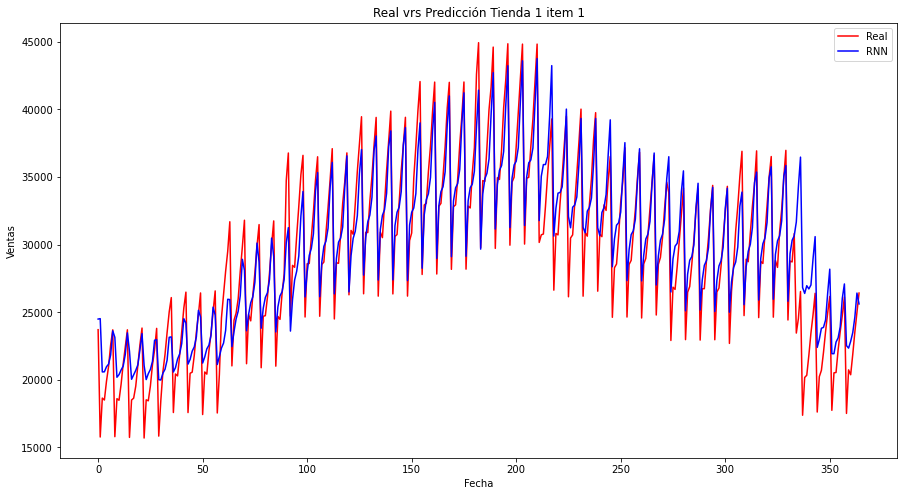

In [40]:
plt.figure(figsize = (15, 8)),
plt.plot(realsales, color="red", label="Real")
plt.plot(real_predicciones, color="blue", label="RNN")
plt.title("Real vrs Predicción Tienda 1 item 1")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.legend()
plt.show()

### SMAPE

In [41]:
smape = round(np.mean(np.abs(realsales-real_predicciones)/((np.abs(real_predicciones)+np.abs(realsales))/2))*100,2)
print(smape, "%")

5.98 %
